<a href="https://colab.research.google.com/github/zenintelligence/shinjimei/blob/master/HundeBeispiel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade deeplearning2020
from deeplearning2020.datasets import ImageWoof

train_data, test_data, classes = ImageWoof.load_data()

  Created wheel for deeplearning2020: filename=deeplearning2020-0.4.18-py2.py3-none-any.whl size=8393 sha256=96f103bed4f79370921152dc2eeb176341138aab442d92172ed35edc57b7be31
  Stored in directory: /root/.cache/pip/wheels/c9/24/f5/8258a898fd2cd12315ca220f208be60cc08dc29bc6bd73a0df
Successfully built deeplearning2020
  Found existing installation: deeplearning2020 0.4.17
    Uninstalling deeplearning2020-0.4.17:
      Successfully uninstalled deeplearning2020-0.4.17
/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images


In [2]:
#Loading packages
#!pip install deeplearning2020
%tensorflow_version 2.x # Befehl für Google Colab für Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
assert tf.__version__ >= "2.0"
if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Befehl für Google Colab für Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from deeplearning2020 import helpers
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
#%matplotlib inline

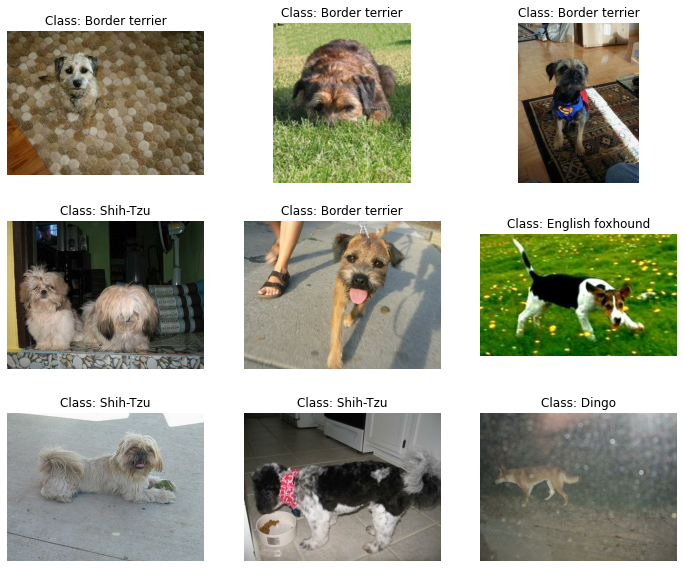

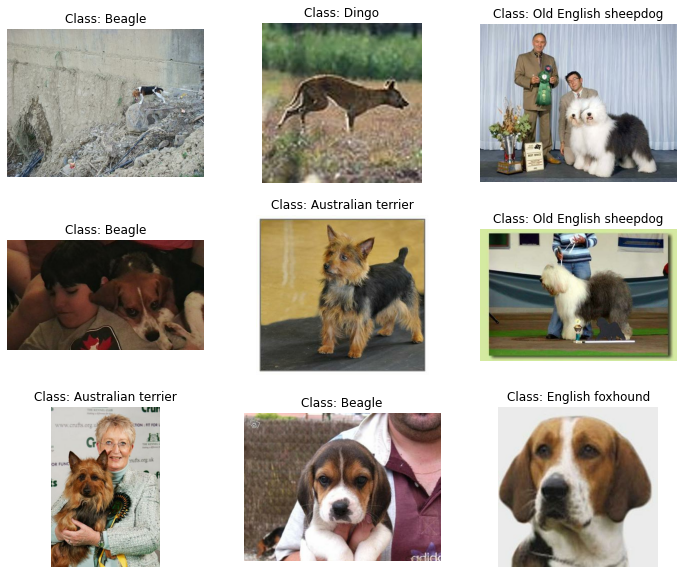

In [4]:
helpers.plot_images(train_data.take(9), classes)
helpers.plot_images(test_data.take(9), classes) 

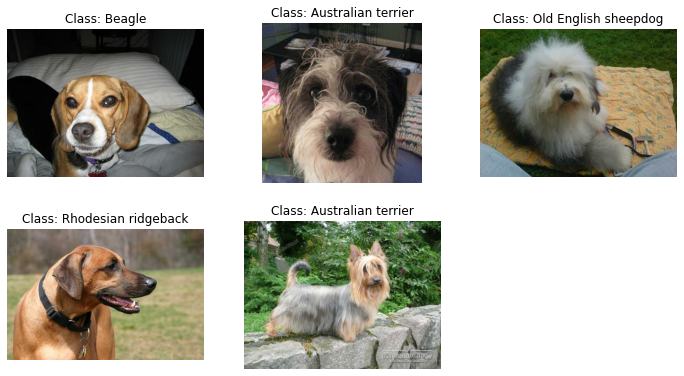

In [5]:
helpers.plot_images(train_data.take(5), classes)

In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label


In [7]:
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)

shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


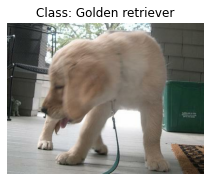

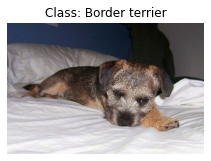

In [5]:
helpers.plot_images(train_data.take(1), classes)
helpers.plot_images(test_data.take(1), classes) 

In [0]:
# Parameter des Modells
n_classes=10
learning_rate=0.0001
momentum=0.9
dense_neurons=500
n_filters=32
first_kernel_size=(7,7)

activation='elu'

# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=n_filters,
    kernel_size=(7,7),
    activation=activation
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 32, 
    kernel_size=(3,3), 
    activation=activation
  )(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = 32, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)

# Output Layer
output = Dense(
    n_classes,
   activation="softmax"
)(model)

CNN_model = Model(input_layer, output)

# Kompilieren des Modells
optimizer = keras.optimizers.SGD(
    lr=learning_rate,
    momentum=momentum
)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [9]:
CNN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 294, 294, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0     

In [10]:
# Training des Modells
history = CNN_model.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)

Epoch 1/12
283/283 [==============================] - 31s 109ms/step - loss: 2.2986 - accuracy: 0.1192 - val_loss: 2.2857 - val_accuracy: 0.1280
Epoch 2/12
283/283 [==============================] - 31s 108ms/step - loss: 2.2849 - accuracy: 0.1493 - val_loss: 2.2790 - val_accuracy: 0.1497
Epoch 3/12
283/283 [==============================] - 30s 107ms/step - loss: 2.2758 - accuracy: 0.1663 - val_loss: 2.2658 - val_accuracy: 0.1774
Epoch 4/12
283/283 [==============================] - 31s 108ms/step - loss: 2.2620 - accuracy: 0.1834 - val_loss: 2.2476 - val_accuracy: 0.2046
Epoch 5/12
283/283 [==============================] - 30s 107ms/step - loss: 2.2356 - accuracy: 0.2023 - val_loss: 2.2103 - val_accuracy: 0.2107
Epoch 6/12
283/283 [==============================] - 30s 107ms/step - loss: 2.1851 - accuracy: 0.2133 - val_loss: 2.1462 - val_accuracy: 0.2194
Epoch 7/12
283/283 [==============================] - 30s 106ms/step - loss: 2.1315 - accuracy: 0.2222 - val_loss: 2.1093 - val_ac

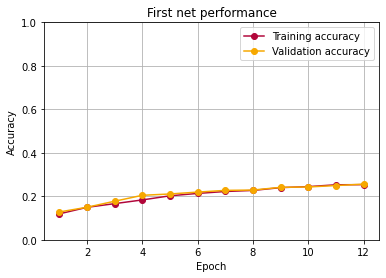

In [11]:
helpers.plot_history('First net performance', history, 0)

In [0]:
+ö